5(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from ISLP.models import ModelSpec as MS
import patsy as pt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from IPython.display import HTML
import copy
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(1)
n = 500
p = 2

x1 = np.random.uniform(0, 1, n) - 0.5
x2 = np.random.uniform(0, 1, n) - 0.5
y  = 1*(x1**2-x2**2 > 0)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df.head()


,x1,x2,y
0,-0.082978,-0.412518,0
1,0.220324,-0.272690,0
2,-0.499886,-0.185623,1
3,-0.197667,-0.325234,0
4,-0.353244,0.107094,1


(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the y-axis.

Text(0, 0.5, 'X2')

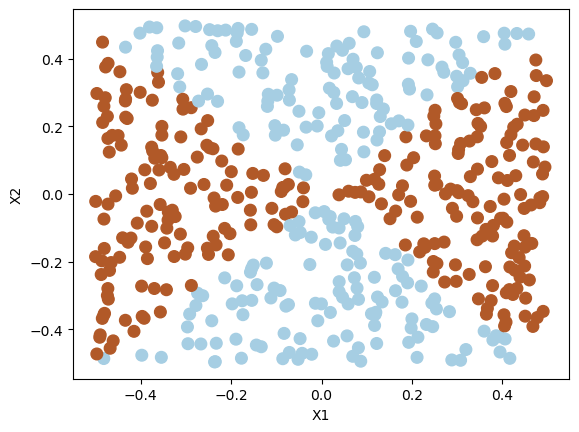

In [2]:
plt.scatter(x1, x2, s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors

In [3]:
X=df.drop(columns=["y"])
y=df["y"]

# By default scikit-learn uses an l2 regularization penalty, which we don't want for
# vanilla logistic regression as described in the book
log_reg = LogisticRegression(penalty = "none", solver = "lbfgs")
log_reg.fit(X, y)
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = X.columns.insert(0, "intercept"))


,Coef. Est.
intercept,0.159565
x1,-0.091554
x2,-0.252300


(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear.

In [4]:
log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns = log_reg.classes_).head(10)

,0,1
0,0.432603,0.567397
1,0.448139,0.551861
2,0.437291,0.562709
3,0.435433,0.564567
4,0.458872,0.541128
5,0.445544,0.554456
6,0.472908,0.527092
7,0.437049,0.562951
8,0.470513,0.529487
9,0.444845,0.555155


In [5]:
log_reg_pred = log_reg.predict(X)
logit_res=pd.DataFrame(np.hstack((log_reg_probs, log_reg_pred.reshape(-1,1))), 
             columns = np.concatenate((log_reg.classes_, ["Prediction"])))
logit_res.head(10)

,0,1,Prediction
0,0.432603,0.567397,1.0
1,0.448139,0.551861,1.0
2,0.437291,0.562709,1.0
3,0.435433,0.564567,1.0
4,0.458872,0.541128,1.0
5,0.445544,0.554456,1.0
6,0.472908,0.527092,1.0
7,0.437049,0.562951,1.0
8,0.470513,0.529487,1.0
9,0.444845,0.555155,1.0


Training accuracy: 0.542


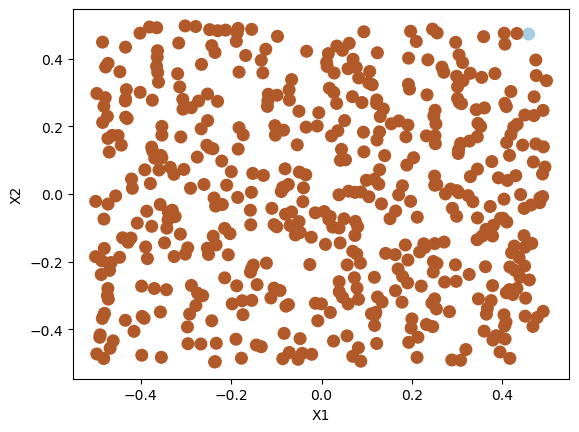

In [6]:
plt.scatter(x1, x2, s=70, c=logit_res["Prediction"], cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

print(f'Training accuracy: {log_reg.score(X, y)}')

(e) Now ft a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X1^2 , X1×X2, log(X2),and so forth).

In [7]:
lg_X=X
lg_X["x1_sq"]=np.power(X["x1"], 2)
lg_X["x2_sq"]=np.power(X["x2"], 2)
lg_X["x1x2"]=X["x1"]*X["x2"]

lg_X.head()

,x1,x2,x1_sq,x2_sq,x1x2
0,-0.082978,-0.412518,0.006885,0.170171,0.034230
1,0.220324,-0.272690,0.048543,0.074360,-0.060080
2,-0.499886,-0.185623,0.249886,0.034456,0.092790
3,-0.197667,-0.325234,0.039072,0.105777,0.064288
4,-0.353244,0.107094,0.124781,0.011469,-0.037830


In [8]:
power_logit=LogisticRegression().fit(lg_X, y)
params = np.concatenate((power_logit.intercept_, power_logit.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = lg_X.columns.insert(0, "intercept"))

,Coef. Est.
intercept,0.083531
x1,-0.124443
x2,-0.237175
x1_sq,6.587327
x2_sq,-6.213156
x1x2,0.187837


(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which
the predicted class labels are obviously non-linear

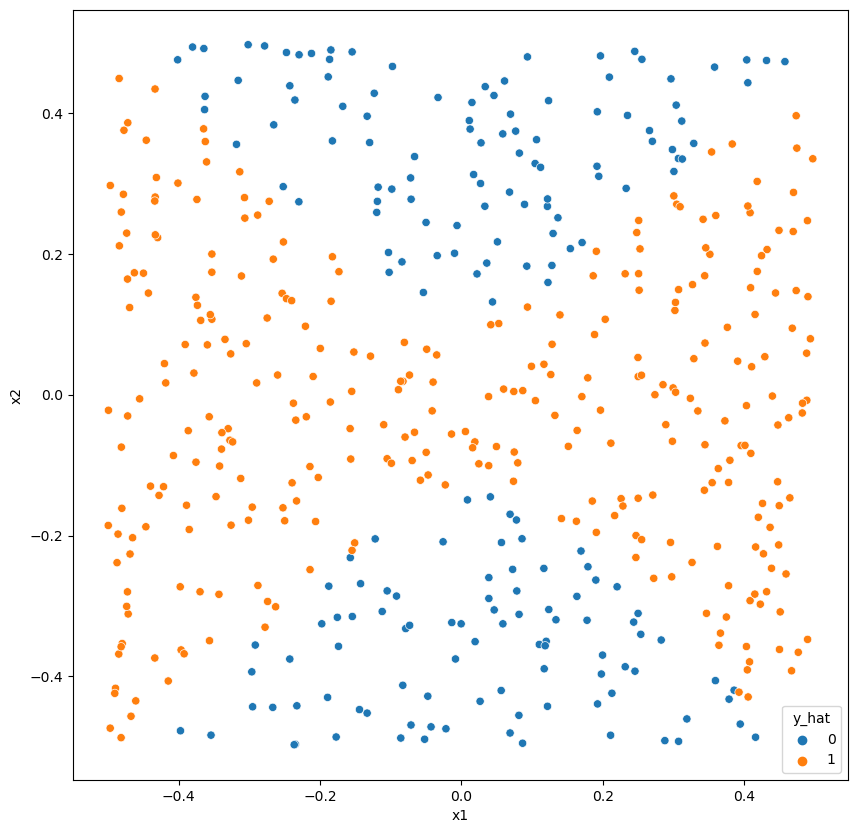

Training accuracy: 0.922


In [9]:
# make prediction
power_logit_pred = power_logit.predict(lg_X)

# plot it
plot_power_logit = pd.DataFrame({'x1': X["x1"], 'x2':X["x2"], 'y_hat':power_logit_pred})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_power_logit)
plt.show();

print(f'Training accuracy: {power_logit.score(lg_X, y)}')

The new model resulted in a non-linear boundary but different the original non-linear boundary.

(g) Fit a support vector classifer to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

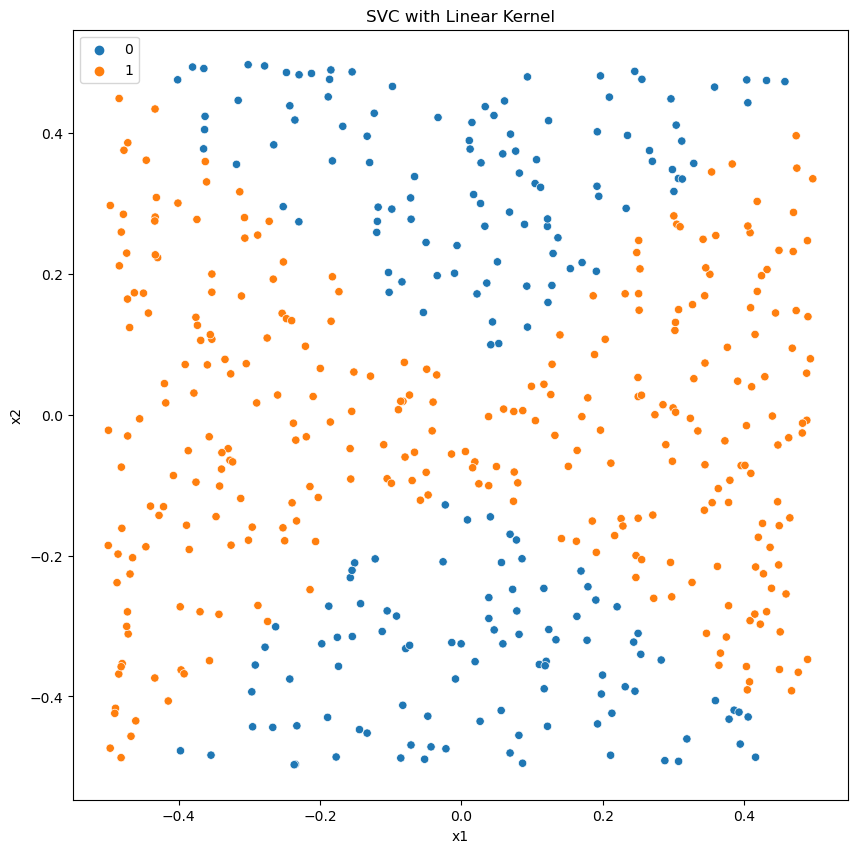

In [10]:


# Fit a support vector classifier (SVC) with a linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)

# Obtain class predictions for each training observation
svc_linear_pred = svc_linear.predict(X)

# Plot the observations, colored according to the predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=svc_linear_pred, data=plot_power_logit)
plt.title('SVC with Linear Kernel')
plt.show();


(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations,colored according to the predicted class labels.

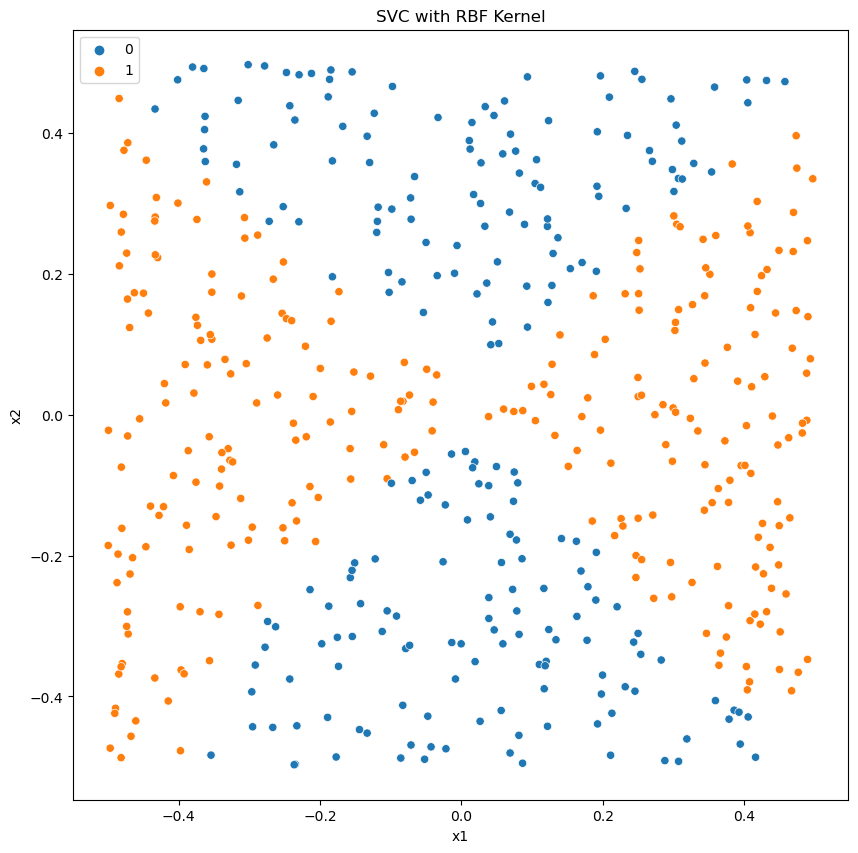

In [11]:
# Fit a support vector machine (SVM) with a non-linear kernel (e.g., radial basis function (RBF) kernel)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X, y)

# Obtain class predictions for each training observation
svc_rbf_pred = svc_rbf.predict(X)

# Plot the observations, colored according to the predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=svc_rbf_pred, data=plot_power_logit)
plt.title('SVC with RBF Kernel')
plt.show();

(i) Comment on your results.


Linear logistic regression struggles with nonlinear boundaries, showing poor performance. However, using a small cost parameter, the linear kernel in SVM performs reasonably well. For datasets with nonlinear relationships, both nonlinear logistic regression and SVM with nonlinear kernels exhibit strong performance in accurately capturing and handling the nonlinear boundaries.

7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [12]:
auto_df = pd.read_csv('C:/Users/nihar/OneDrive/Desktop/Predictive Modeling/Data Sets/Auto.csv')

# Remove observations with missing values
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
#auto_df = auto_df.reset_index()

# convert quantitive values to floats
#quants = ['cylinders', 'horsepower', 'weight', 'year']
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto_df[quants] = auto_df[quants].astype(np.float64)

auto_df['mpg_above_median'] = (auto_df['mpg'] > auto_df['mpg'].median()) *1.
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


(b) Fit a support vector classifer to the data with various values of C, in order to predict whether a car gets high or low gas mileage.Report the cross-validation errors associated with diferent values of this parameter. Comment on your results. Note you will need to ft the classifer without the gas mileage variable to produce sensible results.

In [13]:
from sklearn import preprocessing
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, auto_df)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)

costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)

,Cost,CV_accuracy
0,0.000010,0.630802
1,0.000023,0.630802
2,0.000055,0.630802
3,0.000127,0.630802
4,0.000298,0.681435
5,0.000695,0.818306
6,0.001624,0.877215
7,0.003793,0.882376
8,0.008859,0.902889
9,0.020691,0.895326


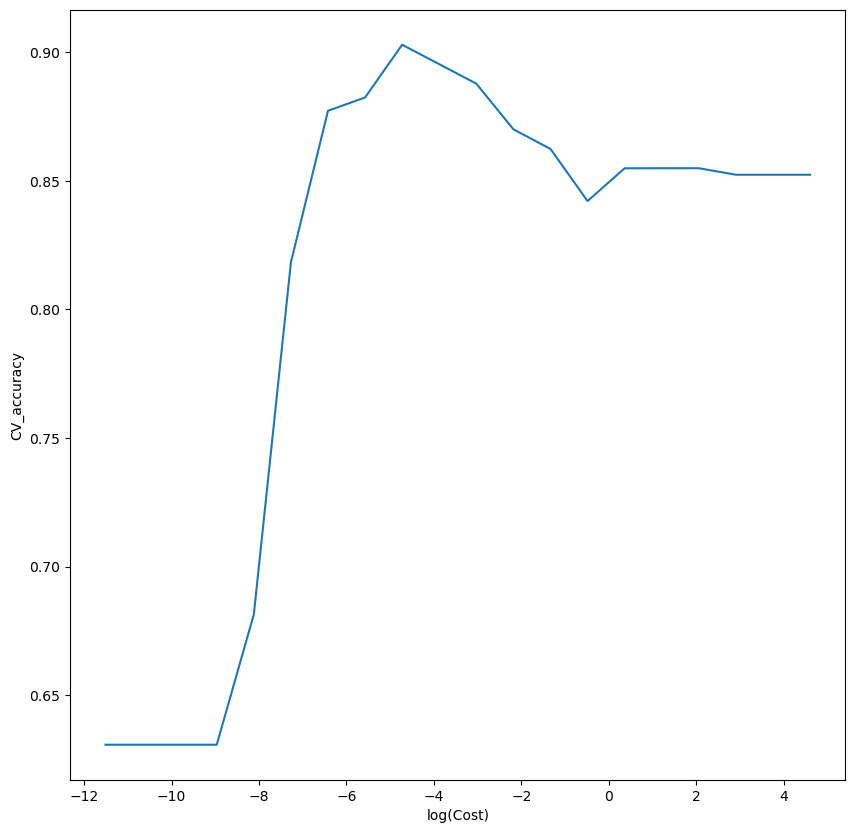

In [14]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);

The errors for SVC of both Linear and Radial are very similar with 0.09711 and 0.09708. Values are considerably low.


(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with diferent values of gamma and degree and
C. Comment on your results.

In [15]:


C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]     # Using only odd values, because I noticed earlier evens are slow!
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)
rbf_grid.best_params_

{'C': 2.154434690031882,
 'degree': 3,
 'gamma': 0.004641588833612777,
 'kernel': 'rbf'}

In [16]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
526,0.001961,0.000084,0.001160,0.000193,2.154435,7,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
486,0.000603,0.000802,0.000546,0.000842,2.154435,3,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 3, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
546,0.002001,0.000634,0.001000,0.000001,2.154435,9,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 9, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
506,0.001843,0.000430,0.000904,0.000197,2.154435,5,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 5, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
390,0.002798,0.000400,0.001601,0.000488,0.035938,9,0.278256,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.949367,...,0.900325,0.033167,5,0.900958,0.907348,0.917197,0.910828,0.914013,0.910069,0.005610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.011399,0.001962,0.005800,0.000401,0.000077,7,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 7, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
78,0.006099,0.007511,0.004173,0.005844,0.00001,9,1000.0,rbf,"{'C': 1e-05, 'degree': 9, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
278,0.006885,0.000494,0.002670,0.000510,0.004642,5,1000.0,rbf,"{'C': 0.004641588833612777, 'degree': 5, 'gamm...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
158,0.009434,0.001094,0.004475,0.000866,0.000077,9,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


(d) Make some plots to back up your assertions in (b) and (c).
Hint: In the lab, we used the plot_svm() function for ftted SVMs.
When p > 2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

[0.13826923 0.11512821 0.1125641  0.09461538 0.08948718 0.08948718
 0.08948718 0.09461538 0.10205128 0.10955128 0.10698718 0.10185897
 0.09416667 0.09416667 0.09673077 0.09416667 0.09673077 0.09673077
 0.09673077 0.09673077 0.09673077 0.09673077 0.09673077 0.09673077
 0.09673077]


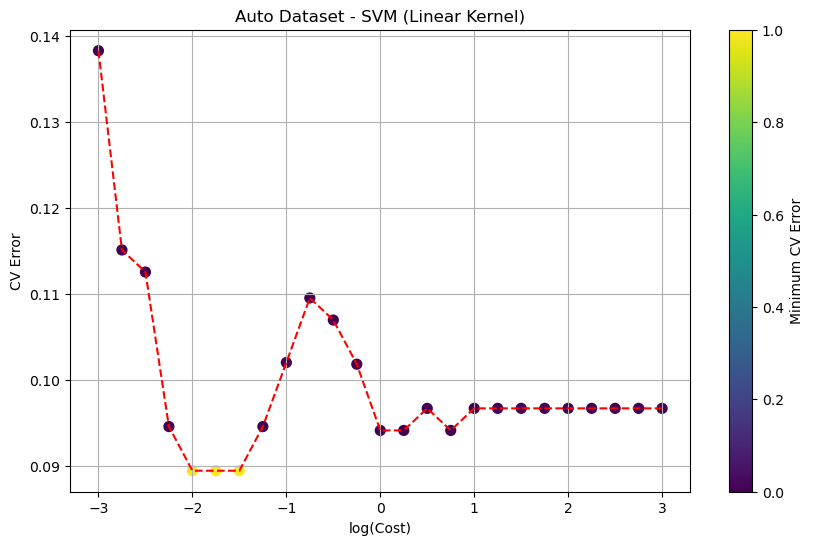

In [17]:
power_range = np.arange(-3, 3.25, 0.25)
cost_range = np.power(10, power_range)
number = 10
repeats = 5

# Initialize an empty matrix to store cross-validation errors
cv_matrix = np.zeros((len(cost_range), repeats))

# Set seed for reproducibility
np.random.seed(202)

# Perform cross-validation and store errors in the cv_matrix
for i in range(repeats):
    for j, cost in enumerate(cost_range):
        # Define SVM model with linear kernel and current cost parameter
        model = svm.SVC(kernel='linear', C=cost, random_state=0)
        # Perform cross-validation
        cv_scores = cross_val_score(model, preprocessing.scale(X), y, cv=number)
        # Calculate error and store in cv_matrix
        cv_matrix[j, i] = 1 - np.mean(cv_scores)

# Calculate average error for each cost
avg_cv_errors = np.mean(cv_matrix, axis=1)

# Find the minimum average error and corresponding cost
min_cv_error = np.min(avg_cv_errors)
best_cost_index = np.argmin(avg_cv_errors)
best_cost = cost_range[best_cost_index]

print(avg_cv_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log10(cost_range), avg_cv_errors, color='red', linestyle='--', label='CV Error')
plt.scatter(np.log10(cost_range), avg_cv_errors, c=(avg_cv_errors == min_cv_error), cmap='viridis', s=50)
plt.xlabel('log(Cost)')
plt.ylabel('CV Error')
plt.title('Auto Dataset - SVM (Linear Kernel)')
plt.colorbar(label='Minimum CV Error')
plt.grid(True)
plt.show()

In [18]:
# Calculate errors LINEAR
errors = 1 - results_df['CV_accuracy']

# Find the index of the lowest error
min_error_index = errors.idxmin()

# Get the corresponding cost value
lowest_cost = results_df['log(Cost)'][min_error_index]

# Print the lowest error and its associated cost
print("Lowest Error:", errors[min_error_index])
print("Associated Cost:", lowest_cost)

Lowest Error: 0.09711132749107443
Associated Cost: -4.726358875093042


In [19]:
# Target score 
target_score = 1.0

# Calculate error RADIAL
errors = target_score - rbf_grid.cv_results_['mean_test_score']

# Find the index of the lowest error
min_error_index = np.argmin(errors)

# Print the lowest error and its associated hyperparameters
lowest_error = errors[min_error_index]
best_params = rbf_grid.cv_results_['params'][min_error_index]

print("Lowest Error:", lowest_error)
print("Associated Hyperparameters:", best_params)

Lowest Error: 0.09707887049659192
Associated Hyperparameters: {'C': 2.154434690031882, 'degree': 3, 'gamma': 0.004641588833612777, 'kernel': 'rbf'}


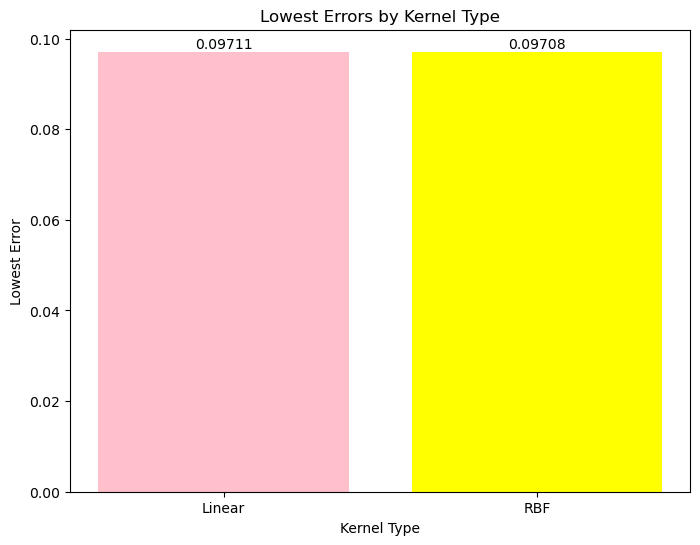

In [20]:
# Target score
target_score = 1.0

# Calculate error for RBF kernel
rbf_errors = target_score - rbf_grid.cv_results_['mean_test_score']
# Find the index of the lowest error for RBF kernel
min_rbf_error_index = np.argmin(rbf_errors)
# Get the lowest error and its associated hyperparameters for RBF kernel
lowest_rbf_error = rbf_errors[min_rbf_error_index]
best_rbf_params = rbf_grid.cv_results_['params'][min_rbf_error_index]

# Calculate errors for linear kernel
linear_errors = 1 - results_df['CV_accuracy']
# Find the index of the lowest error for linear kernel
min_linear_error_index = linear_errors.idxmin()
# Get the lowest error and its associated cost for linear kernel
lowest_linear_error = linear_errors[min_linear_error_index]
lowest_linear_cost = results_df['Cost'][min_linear_error_index]

# Data for plotting
kernel_errors = {
    'Kernel': ['Linear', 'RBF'],
    'Lowest Error': [lowest_linear_error, lowest_rbf_error]
}

# Create DataFrame
df_kernel_errors = pd.DataFrame(kernel_errors)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(df_kernel_errors['Kernel'], df_kernel_errors['Lowest Error'], color=['pink', 'yellow'])
plt.xlabel('Kernel Type')
plt.ylabel('Lowest Error')
plt.title('Lowest Errors by Kernel Type')

# Annotate bars with error values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.5f}'.format(height), ha='center', va='bottom')

plt.show()

The average CV error was found to be 0.0894.

8. This problem involves the OJ data set which is part of the ISLP package.
(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [21]:

sns.set()




#read in oj file
oj_df=pd.read_csv("C:/Users/nihar/OneDrive/Desktop/Predictive Modeling/Data Sets/oj.csv")
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [22]:
from sklearn.model_selection import train_test_split
preds = "+".join(oj_df.columns.drop("Purchase"))
f = f'Purchase ~ {preds}'
y, X = pt.dmatrices(f, oj_df)
y = y[:, 0]

# scale data
X = preprocessing.scale(X)

# Split training test sets
test_size = len(y)-800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

(b) Fit a support vector classifer to the training data using
C = 0.01, with Purchase as the response and the other variables
as predictors. How many support points are there?

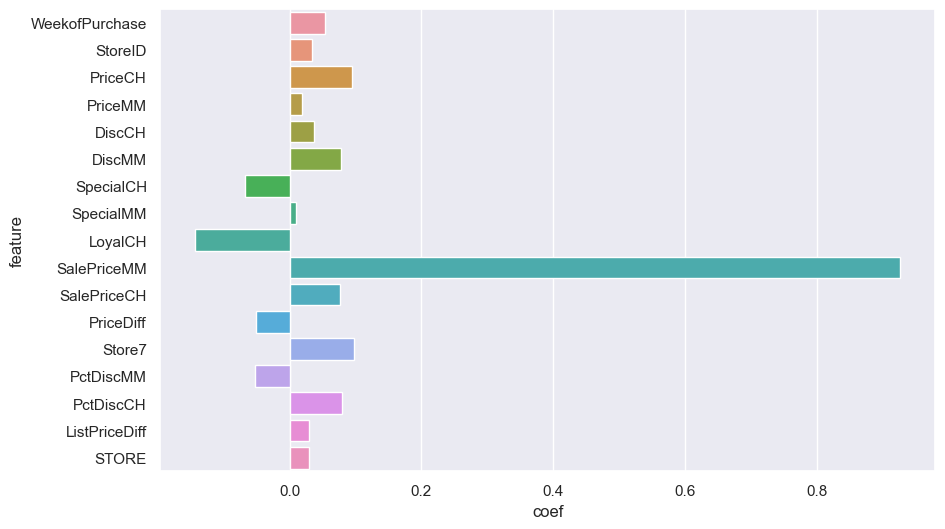

In [23]:
model = SVC(C=0.01, kernel='linear', random_state=0).fit(X_train, y_train)

df = pd.DataFrame({'feature': oj_df.columns.drop('Purchase'),
              'coef': np.ravel(model.coef_)[1:]})
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='feature', data=df);

In [24]:
model.support_vectors_.shape[0]

433

(c) What are the training and test error rates?

In [25]:
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.833
test accuracy : 0.833


(d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [26]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)
model_grid.best_params_

{'C': 2.154434690031882}

(e) Compute the training and test error rates using this new value for C.

In [27]:
accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.831
test accuracy : 0.841


(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [28]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.851
test accuracy : 0.844


(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [29]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='poly', degree=2), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.806
test accuracy : 0.767


(h) Overall, which approach seems to give the best results on this data?

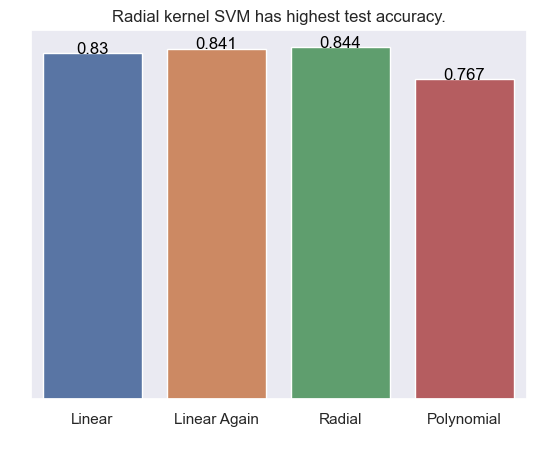

In [30]:
# Create data frame of Model Names and Accuracy scores
df = pd.DataFrame({
    'Models':["Linear","Linear Again","Radial","Polynomial"],
    'Accuracy':[0.830, 0.841, 0.844, 0.767] 
}, columns=['Models', 'Accuracy'])

# bar plot in seaborn
ax = sns.barplot(x="Models", y="Accuracy", data=df, dodge=False)
ax.set_yticks([]) #remove y-axis
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Radial kernel SVM has highest test accuracy.')
# add values to top of bar
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
for index, row in df.iterrows():
    ax.text(row.name,row.Accuracy, round(row.Accuracy,3), color='black', ha="center")